# Binary Classification based on Logistic Regression


## import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

* Total number of training data is $1000$ ( each two cluster has $500$ data )
* Total number of testing data is $1000$ ( clusters have $500$ datasets each ) 
* $\sigma : 3.0$

## Declare the constants and Generate each datasets

In [2]:
c1 = np.array([[10, 10, 0]])
c2 = np.array([[20, 20, 1]])

N = 500
TOTAL = N * 2     # total number of dataset is 1000 (training/testing each)
STD_VAR = 3.0     # stdvar of dataset is 3.0 (dataset are generated with N(0, 3.0^2) from their centroid)

u1 = np.concatenate((STD_VAR * np.random.randn(N, 2), np.zeros((N, 1))), axis=1)
u2 = np.concatenate((STD_VAR * np.random.randn(N, 2), np.zeros((N, 1))), axis=1)

train_data = np.concatenate((c1 + u1, c2 + u1), axis=0).T
test_data = np.concatenate((c1 + u2, c2 + u2), axis=0).T


def input_plot(g1, g2, title, color, label, **kwargs):
    plt.title(title)
    plt.scatter(g1[0, :], g1[1, :], s=10, color=color[0], alpha=0.5, label=label[0])
    plt.scatter(g2[0, :], g2[1, :], s=10, color=color[1], alpha=0.5, label=label[1])

    if kwargs.get("divide"):
        plt.scatter(kwargs.get("g3")[0, :], kwargs.get("g3")[1, :], s=10, color=color[2], alpha=0.5, label=label[2])
        plt.scatter(kwargs.get("g4")[0, :], kwargs.get("g4")[1, :], s=10, color=color[3], alpha=0.5, label=label[3])

    if kwargs.get("legend"):
        plt.legend(loc='upper left')

    plt.show()


def output_plot(g1, g2, title, color, label, xlabel, ylabel, legend):
    plt.title(title)
    plt.plot(np.arange(1, len(g1) + 1), g1, color=color[0], alpha=0.5, label=label[0])
    plt.plot(np.arange(1, len(g2) + 1), g2, color=color[1], alpha=0.5, label=label[1])
    plt.legend(loc=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Plot training & testing datasets

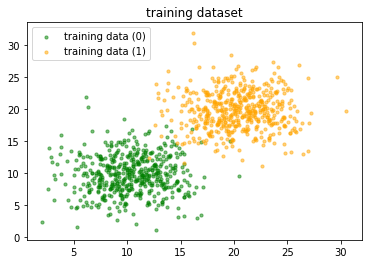

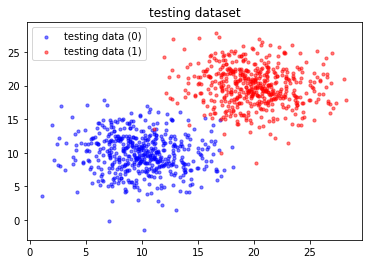

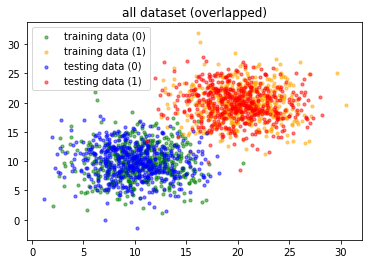

In [3]:
input_plot(g1=train_data[:2, :N], g2=train_data[:2, N:],
           title='training dataset', color=('green', 'orange'), legend=True,
           label=('training data (0)', 'training data (1)'))
input_plot(g1=test_data[:2, :N], g2=test_data[:2, N:],
           title='testing dataset', color=('blue', 'red'), legend=True,
           label=('testing data (0)', 'testing data (1)'))
input_plot(g1=train_data[:2, :N], g3=test_data[:2, :N],
           g2=train_data[:2, N:], g4=test_data[:2, N:],
           title="all dataset (overlapped)", color=('green', 'orange', 'blue', 'red'),
           label=('training data (0)', 'training data (1)', 'testing data (0)', 'testing data (1)'),
           legend=True, divide=True)

## Implements of binary classificiaton

* $y' = \sigma(z)$ where $z = w^T x + b$ and $\sigma(z) = \frac{1}{1 + \exp(-z)}$
* (Learning Rate) $\alpha = 0.015$
* (Cross-Entropy) $f(y', y) = - y \log y' - (1 - y) \log (1 - y')$
* (Loss function) $\mathcal{L} = \frac{1}{n} \sum_{i=1}^n f_i(y'_i, y_i)$

* Also, Partial differential derivative of Loss function is

$$\frac{\partial \mathcal{L}}{\partial w_i} = \frac{1}{n} \sum_{x} x_i (\sigma(z) - y_i) $$

In [4]:
def binary_classify():
    learning_rate = 0.015
    w = np.array([0, 0])  # [u, v]
    b = 0  # bias

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def distance(prob, ans):
        return -(np.nan_to_num(ans * np.log(prob)) + np.nan_to_num((1 - ans) * np.log(1 - prob)))

    def loss(prob, ans):
        return (1 / TOTAL) * np.nan_to_num(np.sum(distance(prob, ans)))

    def accuracy(prob, ans):
        arr = np.array(list(map(lambda x: 1 if x > 0.5 else 0, prob)))
        arr = list(filter(lambda x: x == 0, arr - ans))
        return len(arr) / TOTAL

    def dw(z):
        return (1 / TOTAL) * np.sum(train_data[:2, :] * (sigmoid(z) - train_data[2, :]), axis=1)

    def db(z):
        return (1 / TOTAL) * np.sum(sigmoid(z) - train_data[2, :])

    def iterate():
        p_train_loss = 0
        nonlocal w, b, train_losses, test_losses, train_accuracies, test_accuracies

        while True:
            train_z = np.dot(w.T, train_data[:2, :]) + b
            test_z = np.dot(w.T, test_data[:2, :]) + b

            w = w - (learning_rate * dw(train_z))
            b = b - (learning_rate * db(train_z))

            n_train_loss = loss(sigmoid(train_z), train_data[2, :])
            n_test_loss = loss(sigmoid(test_z), test_data[2, :])

            n_train_acc = accuracy(sigmoid(train_z), train_data[2, :])
            n_test_acc = accuracy(sigmoid(test_z), test_data[2, :])

            train_losses.append(n_train_loss)
            test_losses.append(n_test_loss)
            train_accuracies.append(n_train_acc)
            test_accuracies.append(n_test_acc)

            if abs(p_train_loss - n_train_loss) < 10e-6:
                break
            else:
                p_train_loss = n_train_loss
                continue

    iterate()

    return train_losses, test_losses, train_accuracies, test_accuracies


train_loss, test_loss, train_acc, test_acc = binary_classify()

## Plot the learning curves

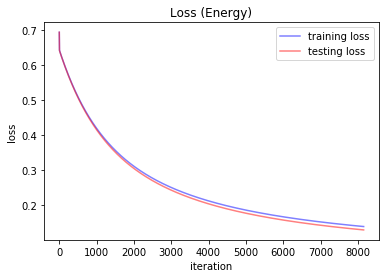

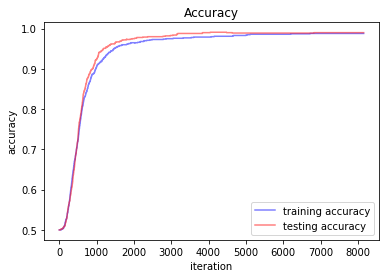

In [5]:
output_plot(train_loss, test_loss,
            title="Loss (Energy)", color=('blue', 'red'),
            label=('training loss', 'testing loss'), legend='upper right', xlabel="iteration", ylabel="loss")
output_plot(train_acc, test_acc,
            title="Accuracy", color=('blue', 'red'),
            label=('training accuracy', 'testing accuracy'), legend='lower right', xlabel="iteration", ylabel="accuracy")